In [1376]:
import os, math
import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, trange
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Input, BatchNormalization
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statistics import pstdev, mean
from tensorflow.keras.models import load_model
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split, KFold
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

In [1377]:
import os

# Define the directory containing the CSV files
directory = r'C:\Users\19176\Desktop\Ohio Data Set\data\prediabetic_file'  # Use absolute path with raw string

# Check if the directory exists
if not os.path.exists(directory):
    print(f"Directory does not exist: {directory}")
else:
    print(f"Directory exists: {directory}")

# Initialize a dictionary to store file sizes
file_sizes = {}

# Iterate over all files in the directory and subdirectories
for root, dirs, files in os.walk(directory):
    for filename in files:
        print(f"Found file: {filename}")  # Print each file found
        if filename.endswith('.csv'):
            # Get the full file path
            file_path = os.path.join(root, filename)
            # Get the size of the file
            file_size = os.path.getsize(file_path)
            # Store the size in the dictionary
            file_sizes[filename] = file_size

# Check if any CSV files were found
if not file_sizes:
    print("No CSV files found in the directory.")
else:
    # Find the largest file
    largest_file = max(file_sizes, key=file_sizes.get)
    largest_size = file_sizes[largest_file]
    print(f"The largest file is {largest_file} with a size of {largest_size} bytes.")


Directory exists: C:\Users\19176\Desktop\Ohio Data Set\data\prediabetic_file
Found file: cleaned_Dexcom_006.csv
Found file: prediabetic_cleaning_data.ipynb
Found file: prediabetic_training_model.ipynb
Found file: cleaned_Dexcom_001.csv
Found file: cleaned_Dexcom_002.csv
Found file: cleaned_Dexcom_003.csv
Found file: cleaned_Dexcom_006.csv
Found file: Dexcom_001.csv
Found file: Dexcom_002.csv
Found file: Dexcom_003.csv
Found file: Dexcom_004.csv
Found file: Dexcom_005.csv
Found file: Dexcom_007.csv
Found file: Dexcom_008.csv
Found file: Dexcom_009.csv
Found file: Dexcom_010.csv
Found file: Dexcom_011.csv
Found file: Dexcom_012.csv
Found file: Dexcom_013.csv
Found file: Dexcom_014.csv
Found file: Dexcom_015.csv
Found file: Dexcom_016.csv
Found file: Dexcom_006.csv
The largest file is Dexcom_006.csv with a size of 172562 bytes.


In [1378]:
import pandas as pd

# Define the file path for Dexcom_006.csv
csv_file_path = r'C:\Users\19176\Desktop\Ohio Data Set\data\prediabetic_file\raw_data_training_folder\Dexcom_006.csv'

# Skip the first 12 rows and read the CSV file
dataFrame = pd.read_csv(csv_file_path, skiprows=12)

# Display the first few rows to verify
dataFrame.head()

,12,Unnamed: 1,Alert,Urgent Low Soon,Unnamed: 4,Unnamed: 5,iPhone G6,55.0,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,13,2020-02-28 12:18:14,EGV,NaN,NaN,NaN,iPhone G6,105.0,NaN,NaN,NaN,NaN,7801.0
1,14,2020-02-28 12:23:14,EGV,NaN,NaN,NaN,iPhone G6,108.0,NaN,NaN,NaN,NaN,8101.0
2,15,2020-02-28 12:28:15,EGV,NaN,NaN,NaN,iPhone G6,108.0,NaN,NaN,NaN,NaN,8401.0
3,16,2020-02-28 12:33:15,EGV,NaN,NaN,NaN,iPhone G6,107.0,NaN,NaN,NaN,NaN,8701.0
4,17,2020-02-28 12:38:14,EGV,NaN,NaN,NaN,iPhone G6,106.0,NaN,NaN,NaN,NaN,9001.0


In [1379]:
# Display the shape/size of the data
dataFrame.shape

(2847, 13)

In [1380]:
# Display first 100 values of the data
dataFrame.head(100)

,12,Unnamed: 1,Alert,Urgent Low Soon,Unnamed: 4,Unnamed: 5,iPhone G6,55.0,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,13,2020-02-28 12:18:14,EGV,NaN,NaN,NaN,iPhone G6,105.0,NaN,NaN,NaN,NaN,7801.0
1,14,2020-02-28 12:23:14,EGV,NaN,NaN,NaN,iPhone G6,108.0,NaN,NaN,NaN,NaN,8101.0
2,15,2020-02-28 12:28:15,EGV,NaN,NaN,NaN,iPhone G6,108.0,NaN,NaN,NaN,NaN,8401.0
3,16,2020-02-28 12:33:15,EGV,NaN,NaN,NaN,iPhone G6,107.0,NaN,NaN,NaN,NaN,8701.0
4,17,2020-02-28 12:38:14,EGV,NaN,NaN,NaN,iPhone G6,106.0,NaN,NaN,NaN,NaN,9001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,108,2020-02-28 20:13:15,EGV,NaN,NaN,NaN,iPhone G6,137.0,NaN,NaN,NaN,NaN,36300.0
96,109,2020-02-28 20:18:14,EGV,NaN,NaN,NaN,iPhone G6,140.0,NaN,NaN,NaN,NaN,36600.0
97,110,2020-02-28 20:23:15,EGV,NaN,NaN,NaN,iPhone G6,140.0,NaN,NaN,NaN,NaN,36900.0
98,111,2020-02-28 20:28:14,EGV,NaN,NaN,NaN,iPhone G6,140.0,NaN,NaN,NaN,NaN,37200.0


In [1381]:
# Display last 100 values of the data
dataFrame.tail(100)

,12,Unnamed: 1,Alert,Urgent Low Soon,Unnamed: 4,Unnamed: 5,iPhone G6,55.0,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
2747,2760,2020-03-09 01:12:52,EGV,NaN,NaN,NaN,iPhone G6,173.0,NaN,NaN,NaN,NaN,831880.0
2748,2761,2020-03-09 01:17:52,EGV,NaN,NaN,NaN,iPhone G6,170.0,NaN,NaN,NaN,NaN,832180.0
2749,2762,2020-03-09 01:22:52,EGV,NaN,NaN,NaN,iPhone G6,165.0,NaN,NaN,NaN,NaN,832480.0
2750,2763,2020-03-09 01:27:53,EGV,NaN,NaN,NaN,iPhone G6,157.0,NaN,NaN,NaN,NaN,832780.0
2751,2764,2020-03-09 01:32:53,EGV,NaN,NaN,NaN,iPhone G6,148.0,NaN,NaN,NaN,NaN,833080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2842,2855,2020-03-09 09:07:51,EGV,NaN,NaN,NaN,iPhone G6,146.0,NaN,NaN,NaN,NaN,860379.0
2843,2856,2020-03-09 09:12:52,EGV,NaN,NaN,NaN,iPhone G6,140.0,NaN,NaN,NaN,NaN,860679.0
2844,2857,2020-03-09 09:17:51,EGV,NaN,NaN,NaN,iPhone G6,134.0,NaN,NaN,NaN,NaN,860979.0
2845,2858,2020-03-09 09:22:51,EGV,NaN,NaN,NaN,iPhone G6,130.0,NaN,NaN,NaN,NaN,861279.0


In [1382]:
# Check for missing values in each column
dataFrame.isnull().sum()

12                    0
Unnamed: 1            0
Alert                 0
Urgent Low Soon    2847
Unnamed: 4         2847
Unnamed: 5         2847
iPhone G6             0
55.0                  0
Unnamed: 8         2847
Unnamed: 9         2847
Unnamed: 10        2847
Unnamed: 11        2847
Unnamed: 12           0
dtype: int64

In [1383]:
# Get a concise summary of the DataFrame
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2847 entries, 0 to 2846
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   12               2847 non-null   int64  
 1   Unnamed: 1       2847 non-null   object 
 2   Alert            2847 non-null   object 
 3   Urgent Low Soon  0 non-null      float64
 4   Unnamed: 4       0 non-null      float64
 5   Unnamed: 5       0 non-null      float64
 6   iPhone G6        2847 non-null   object 
 7   55.0             2847 non-null   float64
 8   Unnamed: 8       0 non-null      float64
 9   Unnamed: 9       0 non-null      float64
 10  Unnamed: 10      0 non-null      float64
 11  Unnamed: 11      0 non-null      float64
 12  Unnamed: 12      2847 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 289.3+ KB


In [1384]:
# Generate descriptive statistics
dataFrame.describe()

,12,Urgent Low Soon,Unnamed: 4,Unnamed: 5,55.0,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
count,2847.000000,0.0,0.0,0.0,2847.000000,0.0,0.0,0.0,0.0,2847.000000
mean,1436.000000,NaN,NaN,NaN,124.586934,NaN,NaN,NaN,NaN,434689.746751
std,822.002433,NaN,NaN,NaN,28.908440,NaN,NaN,NaN,NaN,246594.494143
min,13.000000,NaN,NaN,NaN,79.000000,NaN,NaN,NaN,NaN,7801.000000
25%,724.500000,NaN,NaN,NaN,106.000000,NaN,NaN,NaN,NaN,221245.000000
50%,1436.000000,NaN,NaN,NaN,117.000000,NaN,NaN,NaN,NaN,434690.000000
75%,2147.500000,NaN,NaN,NaN,135.000000,NaN,NaN,NaN,NaN,648134.000000
max,2859.000000,NaN,NaN,NaN,222.000000,NaN,NaN,NaN,NaN,861579.000000


In [1385]:
# Check for missing values and return a DataFrame of boolean values
dataFrame.isna().sum()

12                    0
Unnamed: 1            0
Alert                 0
Urgent Low Soon    2847
Unnamed: 4         2847
Unnamed: 5         2847
iPhone G6             0
55.0                  0
Unnamed: 8         2847
Unnamed: 9         2847
Unnamed: 10        2847
Unnamed: 11        2847
Unnamed: 12           0
dtype: int64

In [1386]:
# Rename the column if needed
dataFrame.rename(columns={'55.0': 'CGM'}, inplace=True)

# Extract the column
glucose_values = dataFrame['CGM']

# Display the first few values to verify
print(glucose_values.head())

0    105.0
1    108.0
2    108.0
3    107.0
4    106.0
Name: CGM, dtype: float64


In [1387]:
# Rename the column Unnamed: 1 to Time
dataFrame.rename(columns={'Unnamed: 1': 'Time'}, inplace=True)

# Display the first few rows to verify
dataFrame.head()

,12,Time,Alert,Urgent Low Soon,Unnamed: 4,Unnamed: 5,iPhone G6,CGM,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,13,2020-02-28 12:18:14,EGV,NaN,NaN,NaN,iPhone G6,105.0,NaN,NaN,NaN,NaN,7801.0
1,14,2020-02-28 12:23:14,EGV,NaN,NaN,NaN,iPhone G6,108.0,NaN,NaN,NaN,NaN,8101.0
2,15,2020-02-28 12:28:15,EGV,NaN,NaN,NaN,iPhone G6,108.0,NaN,NaN,NaN,NaN,8401.0
3,16,2020-02-28 12:33:15,EGV,NaN,NaN,NaN,iPhone G6,107.0,NaN,NaN,NaN,NaN,8701.0
4,17,2020-02-28 12:38:14,EGV,NaN,NaN,NaN,iPhone G6,106.0,NaN,NaN,NaN,NaN,9001.0


In [1388]:
# Get only necessary columns
glucoseTime = dataFrame[['Time', 'CGM']]

glucoseTime.head()

,Time,CGM
0,2020-02-28 12:18:14,105.0
1,2020-02-28 12:23:14,108.0
2,2020-02-28 12:28:15,108.0
3,2020-02-28 12:33:15,107.0
4,2020-02-28 12:38:14,106.0


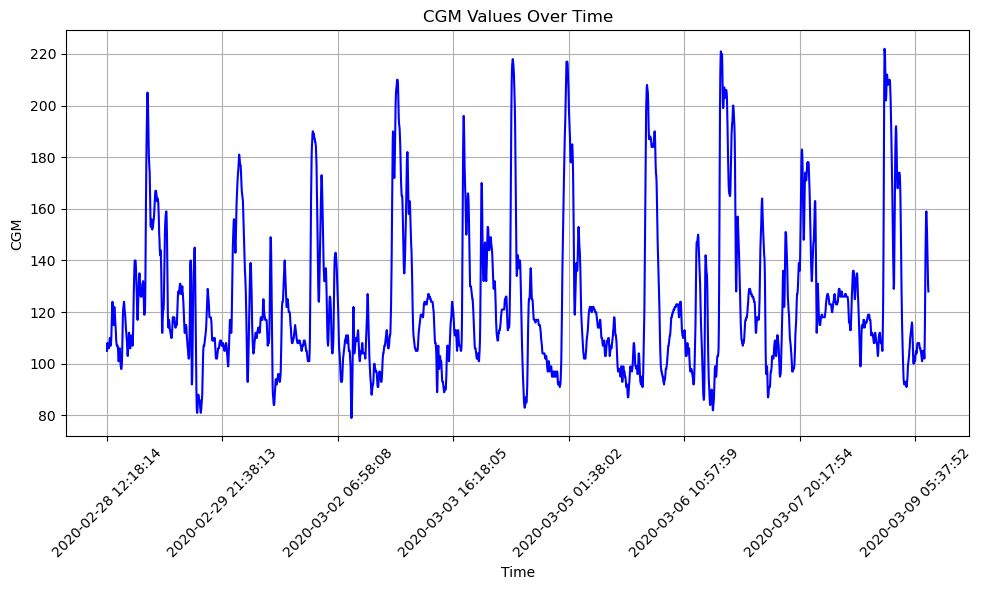

In [1389]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(glucoseTime['Time'], glucoseTime['CGM'], color='b')
plt.title('CGM Values Over Time')
plt.xlabel('Time')
plt.ylabel('CGM')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Set x-axis ticks to a specific interval
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))  # Adjust nbins to your preference

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [1390]:
# Resample Data

In [1391]:
glucoseTime.shape

(2847, 2)

In [1392]:
glucoseTime.columns

Index(['Time', 'CGM'], dtype='object')

In [1393]:
glucoseTime.head()

,Time,CGM
0,2020-02-28 12:18:14,105.0
1,2020-02-28 12:23:14,108.0
2,2020-02-28 12:28:15,108.0
3,2020-02-28 12:33:15,107.0
4,2020-02-28 12:38:14,106.0


In [1394]:
# Assuming glucoseTime is already defined as shown previously
glucoseTime = dataFrame[['Time', 'CGM']]
glucoseTime.shape

(2847, 2)

In [1395]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2847 entries, 0 to 2846
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   12               2847 non-null   int64  
 1   Time             2847 non-null   object 
 2   Alert            2847 non-null   object 
 3   Urgent Low Soon  0 non-null      float64
 4   Unnamed: 4       0 non-null      float64
 5   Unnamed: 5       0 non-null      float64
 6   iPhone G6        2847 non-null   object 
 7   CGM              2847 non-null   float64
 8   Unnamed: 8       0 non-null      float64
 9   Unnamed: 9       0 non-null      float64
 10  Unnamed: 10      0 non-null      float64
 11  Unnamed: 11      0 non-null      float64
 12  Unnamed: 12      2847 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 289.3+ KB


In [1396]:
glucoseTime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2847 entries, 0 to 2846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    2847 non-null   object 
 1   CGM     2847 non-null   float64
dtypes: float64(1), object(1)
memory usage: 44.6+ KB


In [1397]:
glucoseTime.head()

,Time,CGM
0,2020-02-28 12:18:14,105.0
1,2020-02-28 12:23:14,108.0
2,2020-02-28 12:28:15,108.0
3,2020-02-28 12:33:15,107.0
4,2020-02-28 12:38:14,106.0


In [1398]:
# Drop any rows with invalid datetime entries
# Should be the same as the original as the first 12 rows are the only ones with invalid entries
glucoseTime.dropna(subset=['CGM'], inplace=True)
glucoseTime.shape

c:\Users\19176\Documents\Anaconda\envs\tf_env\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(2847, 2)

In [1399]:
print(glucoseTime.isnull().sum())

Time    0
CGM     0
dtype: int64


In [1400]:
# Assuming your DataFrame is named glucoseTime and it has a column 'timestamp' with datetime information
glucoseTime['Time'] = pd.to_datetime(glucoseTime['Time'])  # Convert the column to datetime format

glucoseTime.set_index('Time', inplace=True)  # Set the datetime column as the index

# Now you can resample the data
thirty_minute_resampled = glucoseTime.resample('30T').mean()

# Display the first few rows of the resampled data
print(thirty_minute_resampled.head())
print(thirty_minute_resampled.shape)

                            CGM
Time                           
2020-02-28 12:00:00  107.000000
2020-02-28 12:30:00  106.333333
2020-02-28 13:00:00  108.833333
2020-02-28 13:30:00  118.500000
2020-02-28 14:00:00  118.666667
(475, 1)


c:\Users\19176\Documents\Anaconda\envs\tf_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


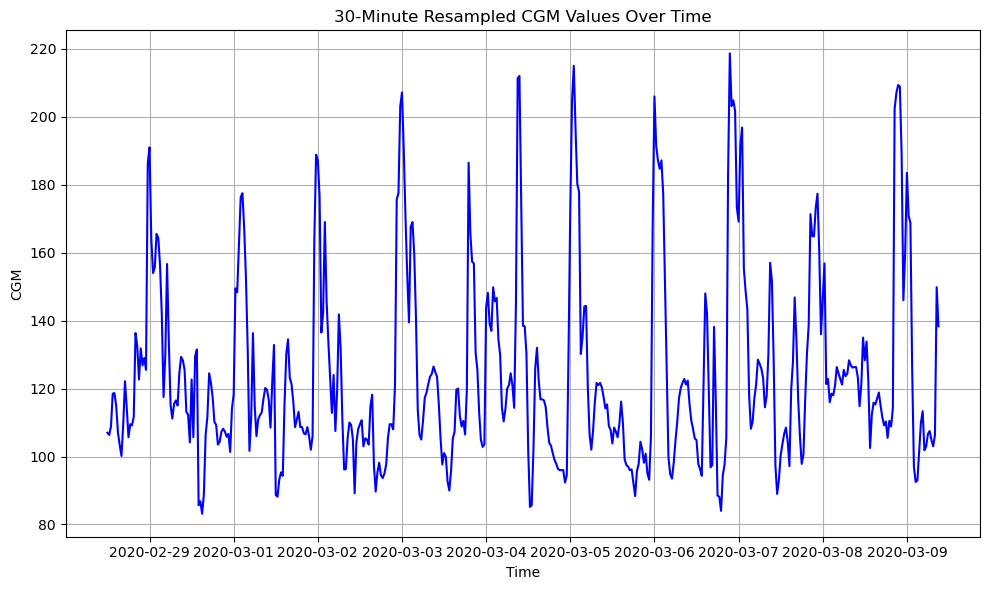

In [1401]:
# Plotting the resampled data
plt.figure(figsize=(10, 6))
plt.plot(thirty_minute_resampled.index, thirty_minute_resampled['CGM'], color='b')
plt.title('30-Minute Resampled CGM Values Over Time')
plt.xlabel('Time')
plt.ylabel('CGM')
plt.grid(True)
plt.xticks(rotation=0)  # Change rotation to 0 for horizontal labels
plt.tight_layout()
plt.show()

In [1402]:
# Change the input data

In [1403]:
# Modify the Dataset
thirty_minute_resampled['CGM_predict'] = thirty_minute_resampled['CGM'].shift(-1)
thirty_minute_resampled.dropna(inplace=True)

thirty_minute_resampled.head()

,CGM,CGM_predict
Time,,
2020-02-28 12:00:00,107.000000,106.333333
2020-02-28 12:30:00,106.333333,108.833333
2020-02-28 13:00:00,108.833333,118.500000
2020-02-28 13:30:00,118.500000,118.666667
2020-02-28 14:00:00,118.666667,114.833333


In [1404]:
thirty_minute_resampled.to_csv("cleaned_Dexcom_006.csv", encoding='utf-8', index=True, header=True)

In [1405]:
file_path = r"C:\Users\19176\Desktop\Ohio Data Set\data\prediabetic_file\prediabetic_cleaned_training\cleaned_Dexcom_006.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

                  Time         CGM  CGM_predict
0  2020-02-28 12:00:00  107.000000   106.333333
1  2020-02-28 12:30:00  106.333333   108.833333
2  2020-02-28 13:00:00  108.833333   118.500000
3  2020-02-28 13:30:00  118.500000   118.666667
4  2020-02-28 14:00:00  118.666667   114.833333


In [1406]:
import os
import pandas as pd

# Define the folder paths
raw_folder_path = r"C:\Users\19176\Desktop\Ohio Data Set\data\prediabetic_file\raw_data_testing_folder"
cleaned_folder_path = r"C:\Users\19176\Desktop\Ohio Data Set\data\prediabetic_file\prediabetic_cleaned_testing"

# Ensure the cleaned data folder exists
if not os.path.exists(cleaned_folder_path):
    os.makedirs(cleaned_folder_path)

# Function to parse datetime with multiple formats
def parse_datetime(date_str):
    for fmt in ('%d-%b-%Y %H:%M:%S', '%Y-%m-%d %H:%M:%S'):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            pass
    raise ValueError(f"No valid date format found for {date_str}")

# Function to find the CGM column within a specified range
def find_cgm_column(columns):
    for col in columns:
        try:
            value = float(col)
            if 55 <= value <= 150:
                return col
        except ValueError:
            continue
    return None

# Loop through all CSV files in the folder
for file_name in os.listdir(raw_folder_path):
    if file_name.endswith('.csv'):  # Check if the file is a CSV
        file_path = os.path.join(raw_folder_path, file_name)
        
        # Read the CSV file, skipping the first 12 rows
        dataFrame = pd.read_csv(file_path, delimiter=',', skiprows=12)  # Adjust delimiter as needed
        # Print the columns to debug
        print(f"Columns in {file_name}: {dataFrame.columns}")
        
        # Rename the necessary columns if they are unnamed
        if 'Unnamed: 1' in dataFrame.columns:
            time_column = 'Unnamed: 1'
        else:
            # Try to find the time column by datetime format
            possible_time_columns = [col for col in dataFrame.columns if ' ' in col and ':' in col]
            if possible_time_columns:
                time_column = possible_time_columns[0]
            else:
                print(f"Skipping {file_name}: Time column not found.")
                continue
        
        cgm_column = find_cgm_column(dataFrame.columns)
        if not cgm_column:
            print(f"Skipping {file_name}: CGM column not found within the specified range.")
            continue
        
        dataFrame.rename(columns={time_column: 'Time', cgm_column: 'CGM'}, inplace=True)
        
        # Strip any leading/trailing spaces from column names
        dataFrame.columns = dataFrame.columns.str.strip()
        
        # Check if necessary columns exist
        if 'Time' in dataFrame.columns and 'CGM' in dataFrame.columns:
            # Get only necessary columns: Time, CGM
            dataFrame = dataFrame[['Time', 'CGM']]
            
            # Print the first few rows to ensure correct data
            print(dataFrame.head())
            
            # Convert the 'Time' column to datetime format using custom parser
            dataFrame['Time'] = dataFrame['Time'].apply(parse_datetime)
            
            # Handle Null Values
            # Drop any rows with invalid datetime entries
            dataFrame.dropna(subset=['CGM'], inplace=True)
            
            # Resample the Data
            # Ensure the 'Time' column is set as the index
            dataFrame.set_index('Time', inplace=True)
            # Resample the data to 30-minute frequency and calculate the mean
            dataFrame = dataFrame.resample('30T').mean()
            
            # Shift data to Get CGM_Predict
            # Modify the Dataset
            dataFrame['CGM_predict'] = dataFrame['CGM'].shift(-1)
            dataFrame.dropna(inplace=True)
            
            # Save the Cleaned Data
            id = file_name[7:10]
            new_name = f"cleaned_Dexcom_{id}.csv"
            cleaned_file_path = os.path.join(cleaned_folder_path, new_name)
            
            dataFrame.to_csv(cleaned_file_path, encoding='utf-8', index=True, header=True)
            print(f"Processed and saved: {cleaned_file_path}")
        else:
            print(f"Skipping {file_name}: Required columns 'Time' and 'CGM' not found.")


Columns in Dexcom_001.csv: Index(['12', 'Unnamed: 1', 'Alert', 'Urgent Low Soon', 'Unnamed: 4',
       'Unnamed: 5', 'iPhone G6', '55.0', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')
                  Time   CGM
0  2020-02-13 17:23:32  61.0
1  2020-02-13 17:28:32  59.0
2  2020-02-13 17:33:32  58.0
3  2020-02-13 17:38:32  59.0
4  2020-02-13 17:43:31  63.0
Processed and saved: C:\Users\19176\Desktop\Ohio Data Set\data\prediabetic_file\prediabetic_cleaned_testing\cleaned_Dexcom_001.csv
Columns in Dexcom_002.csv: Index(['12', 'Unnamed: 1', 'Alert', 'Urgent Low Soon', 'Unnamed: 4',
       'Unnamed: 5', 'Android G6', '55.0', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')
                  Time    CGM
0  2020-02-21 11:08:36  186.0
1  2020-02-21 11:13:36  181.0
2  2020-02-21 11:18:36  175.0
3  2020-02-21 11:23:35  168.0
4  2020-02-21 11:28:36  163.0
Processed and saved: C:\Users\19